In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images/255, test_images/255

class_names = ['airplane', ' automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

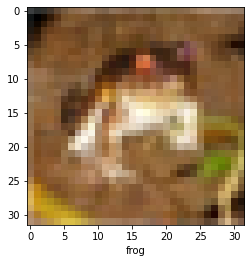

In [3]:
# look at one image
IMG_INDEX = 0

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
# CNN architecture
# building convolutional base (input shape here is (width, height, color_range))
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # Conv2D (amount_of_filters, filter_size); input
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Adding Dense layers to classify images and filters (classifier)
model.add(layers.Flatten())     # input
model.add(layers.Dense(64, activation='relu'))  # hidden layer
model.add(layers.Dense(10))     # output

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
# Training the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5046 - accuracy: 0.4506 - val_loss: 1.2490 - val_accuracy: 0.5584
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1544 - accuracy: 0.5906 - val_loss: 1.0397 - val_accuracy: 0.6306
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0063 - accuracy: 0.6470 - val_loss: 0.9932 - val_accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9166 - accuracy: 0.6802 - val_loss: 0.9710 - val_accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8406 - accuracy: 0.7066 - val_loss: 0.9741 - val_accuracy: 0.6670
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7812 - accuracy: 0.7277 - val_loss: 0.8694 - val_accuracy: 0.6977
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7314 - accuracy: 0.7445 - val_loss: 0.8735 - val_accurac

In [7]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9119 - accuracy: 0.7028
0.7027999758720398


In [11]:
## On my own

cat


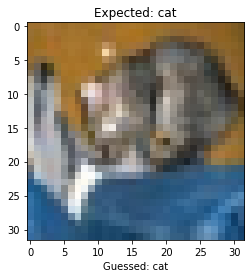

In [12]:
# Prediction
# predict = model.predict(test_images)
# print(predict[0])

def predict_single_image(model, image, image_label):
    predict = model.predict(np.array([image]))
    predicted_value = class_names[np.argmax(predict)]
    print(predicted_value)
    expected_value = class_names[image_label[0]]
    show_image(image, expected_value, predicted_value)

def get_number():
    while True:
        num = input("Enter number of picture: ")
        try:
            num = int(num)
            return num
        except:
            print('Gotta try again...')
            continue

def show_image(image, expected_value, predicted_value):
    plt.figure()
    plt.imshow(image)
    plt.title("Expected: " + expected_value)
    plt.xlabel("Guessed: " + predicted_value)
    plt.show()

a = get_number()
image = test_images[a]
label = test_labels[a]
predict_single_image(model, image, label)

In [13]:
# # Using data preprocessing for smaller data sets

# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

# # creates a data generator object that transforms images
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# # pick an image to transform
# test_img = train_images[14]
# img = image.img_to_array(test_img)  # convert image to numpy array
# img = img.reshape((1,) + img.shape) # reshape image

# i = 0

# for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # loops forever until we break, saving images to current dir
#     plt.figure(i)
#     plot = plt.imshow(image.img_to_array(batch[0]))
#     i += 1
#     if i > 4:   # show 4 images
#         break

# plt.show()

In [1]:
# load, transform and show local image for predicting purposes
from PIL import Image as PImage
img = PImage.open(r"C:\Users\Dzilaj Bilaj\Desktop\doge.jpg")

img = np.array(img)
img = tf.cast(img, tf.float32)  # convert all pixels to integers
img = (img/127.5) - 1           # 1127.5 is exaclty half of 255 which is color value of pixel
img = tf.image.resize(img, (32, 32))

plt.figure()
plt.imshow(img)
plt.show()
print(img.shape)

NameError: name 'np' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


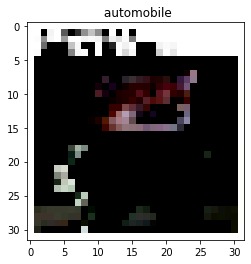

In [17]:
# predict local image
def predict_single_image(model, image):
    predict = model.predict(np.array([image]))
    predicted_value = class_names[np.argmax(predict)]
    show_image(image, predicted_value)

def show_image(image, predicted_value):
    plt.figure()
    plt.imshow(image)
    plt.title(predicted_value)
    plt.show()

predict_single_image(model, img)